In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Replace 'accident_data.csv' with the path to your dataset
df = pd.read_csv("D:\\intership tasks\\road_accident.csv")


In [11]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: drop rows with missing values)
df = df.dropna()

# Convert 'AccidentDate' to datetime
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'], format='%d-%m-%Y')

# Extract hour information from 'Timing'
# Example: Convert 'Morning' to 8 AM and 'Night' to 8 PM for simplicity
timing_to_hour = {
    'Morning': 8,
    'Night': 20
}
df['Hour'] = df['Timing'].map(timing_to_hour)
df['DayOfWeek']=df['AccidentDate'].dt.day_name()
df['Month']=df['AccidentDate'].dt.month_name()

# Display the DataFrame
print(df)

  AccidentDate   Timing          State WeatherCondition       RoadCondition   
0   2013-02-04  Morning  Uttar Pradesh            Rainy  Under Construction  \
1   2005-02-23    Night        Tripura            Clear  Under Construction   
3   2015-01-14    Night      Jharkhand            Rainy               Rough   
5   2019-04-07  Morning        Mizoram            Clear               Rough   
6   2022-07-15  Morning            Goa            Foggy  Under Construction   

   Deaths              Reason  Hour  
0      10       Drunk Driving     8  
1       3  Weather Conditions    20  
3       8     Road Conditions    20  
5       2     Road Conditions     8  
6       4            Speeding     8  
AccidentDate        0
Timing              0
State               0
WeatherCondition    0
RoadCondition       0
Deaths              0
Reason              0
Hour                0
dtype: int64
      AccidentDate   Timing           State WeatherCondition   
0       2013-02-04  Morning   Uttar Pradesh 

C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_2144\1152723200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


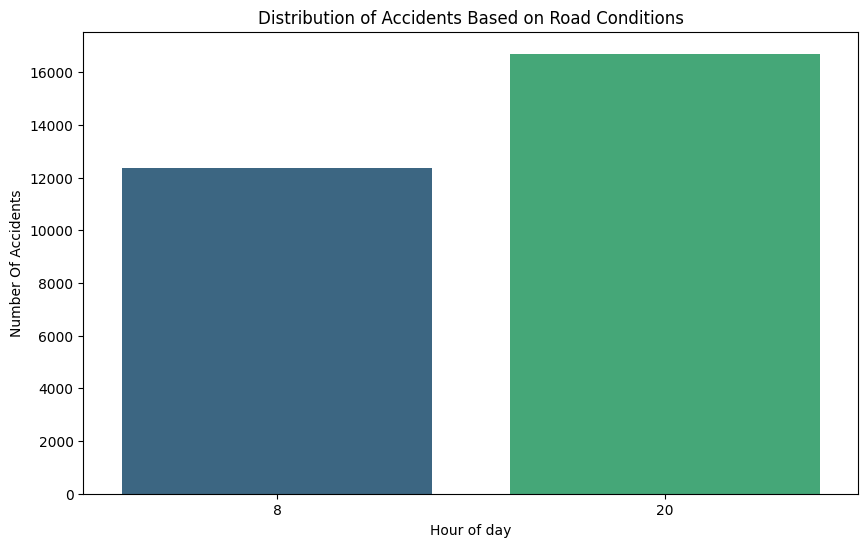

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Distribution of Accidents Based on Road Conditions')
plt.xlabel('Hour of day')
plt.ylabel('Number Of Accidents')
plt.show()

C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_2144\3093067832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


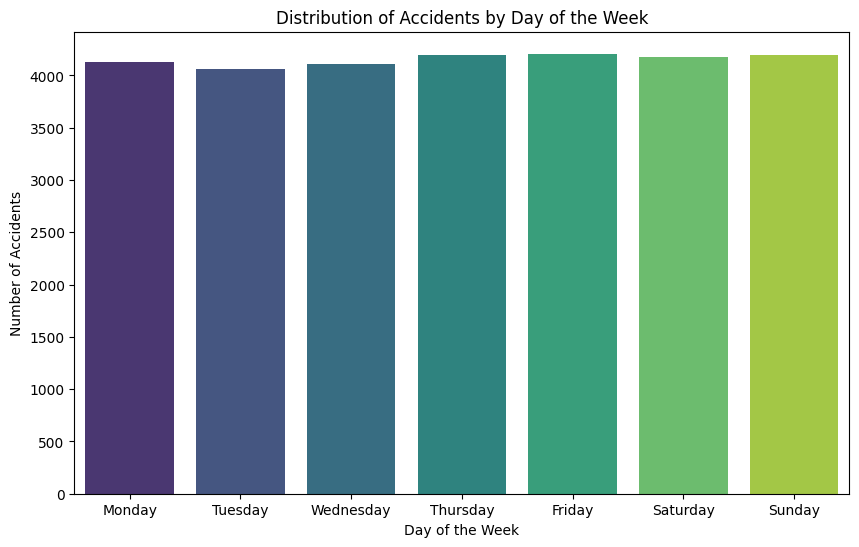

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_2144\3780293661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


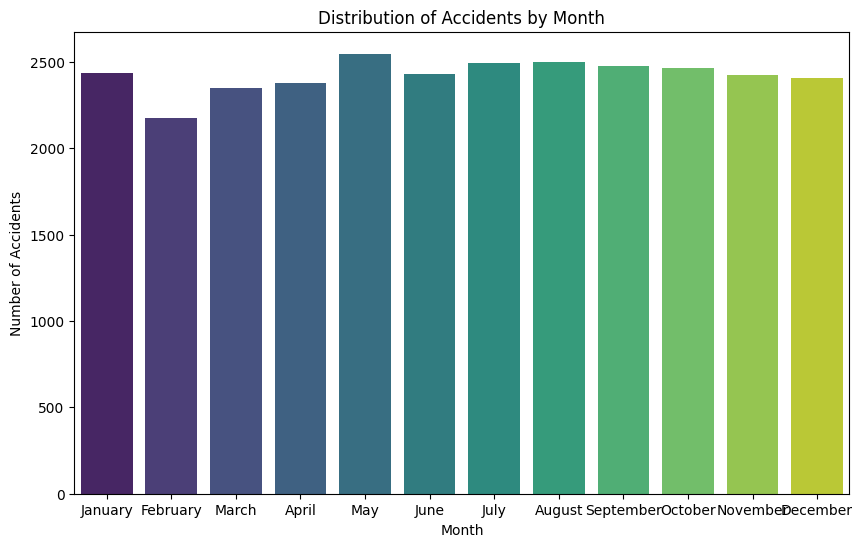

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_2144\3913378435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette='viridis')


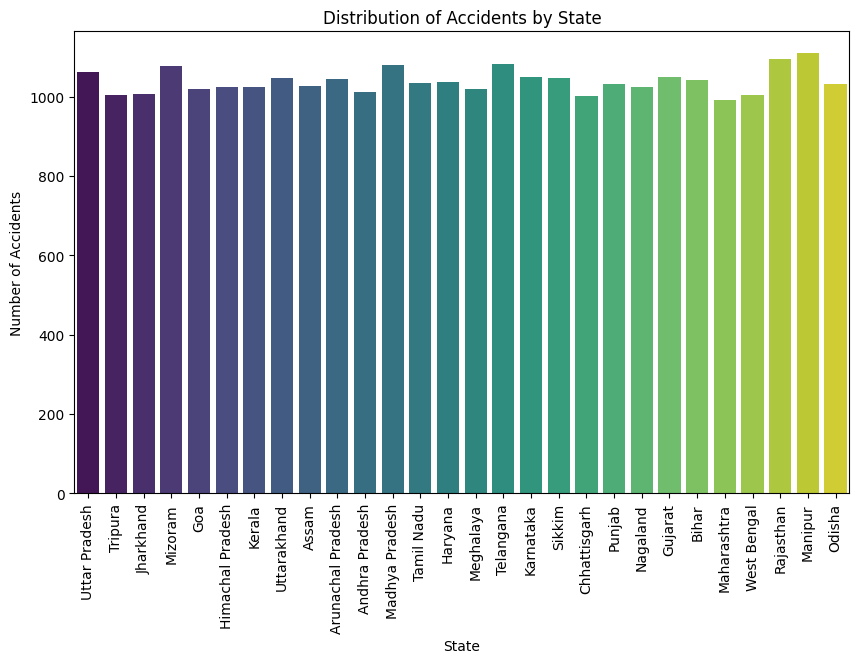

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, palette='viridis')
plt.title('Distribution of Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()
